# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Logistic Regression (Best Treshold) </b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>If you want to be the first to be informed about updates, please do not forget to follow us. </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [WhatsApp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

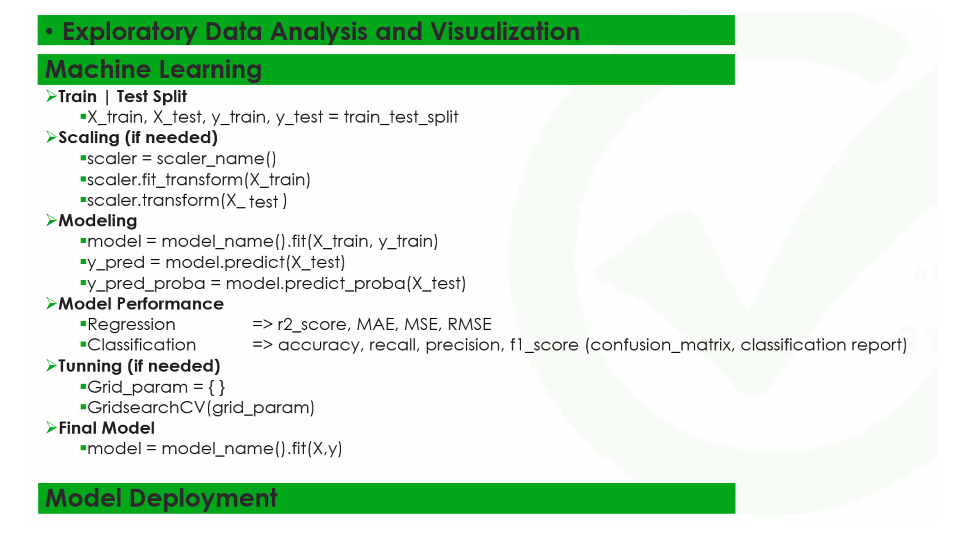

# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,6)


import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# pd.set_option('display.float_format', lambda x: '%.3f' % x)
# pd.options.display.float_format = '{:.3f}'.format

This dataset contains data obtained from diabetes studies conducted on Pima Indian women living in Arizona.

The dataset includes the following features:

1. **Pregnancies:** Number of pregnancies.<br>
2. **Glucose:** Plasma glucose concentration after a 2-hour oral glucose tolerance test.<br>
3. **Blood Pressure:** Blood pressure (mm Hg).<br>
4. **Skin Thickness:** Triceps skinfold thickness (mm).<br>
5. **Insulin:** 2-hour serum insulin (mu U/ml).<br>
6. **BMI:** Body Mass Index (weight in kg/(height in m)^2).<br>
7. **Diabetes Pedigree Function:** A function determining the likelihood of diabetes based on family history.<br>
8. **Age:** Age (years).<br>
9. **Outcome:** Class label (0 or 1), indicating whether the person has diabetes. 1 means the person has diabetes, 0 means they do not.<br>

This dataset is widely used for training machine learning algorithms and in binary classification problems such as predicting diabetes. It is especially used in areas such as data preprocessing, feature engineering, and comparing the performance of classification algorithms.

Typical applications of the dataset include understanding which patient profiles are at risk for diabetes, identifying which features increase the likelihood of diabetes, and developing predictive models to aid in the automatic diagnosis of diabetes.

It is important to note that due to the nature of the dataset, there may be challenges such as missing features or an imbalanced class distribution. These challenges offer an opportunity to delve into machine learning topics such as data cleaning, missing data imputation, handling imbalanced datasets, and model validation techniques.

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [11]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [10]:
df.Outcome.value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

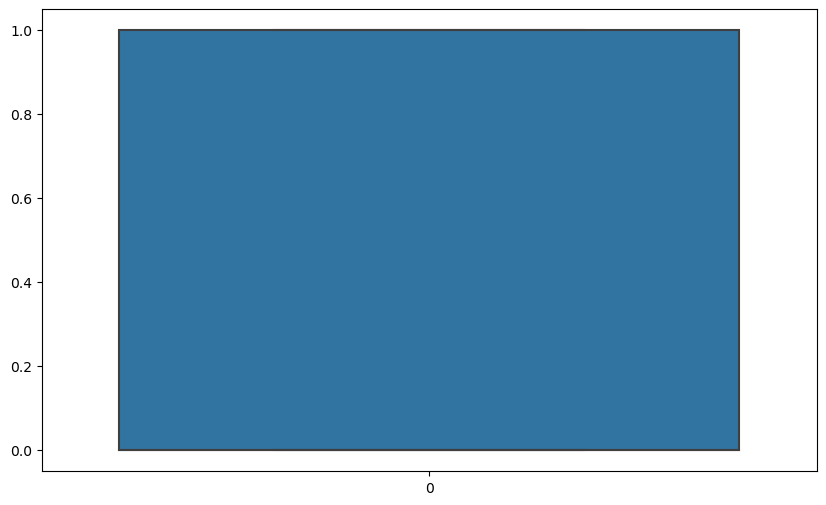

In [13]:
ax = sns.boxplot(df.Outcome)


<Axes: >

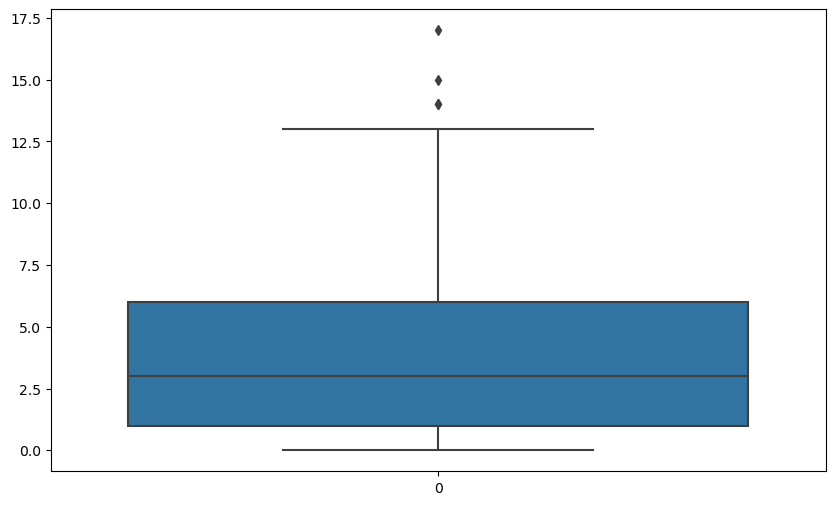

In [15]:
sns.boxplot(df.Pregnancies)

<Axes: >

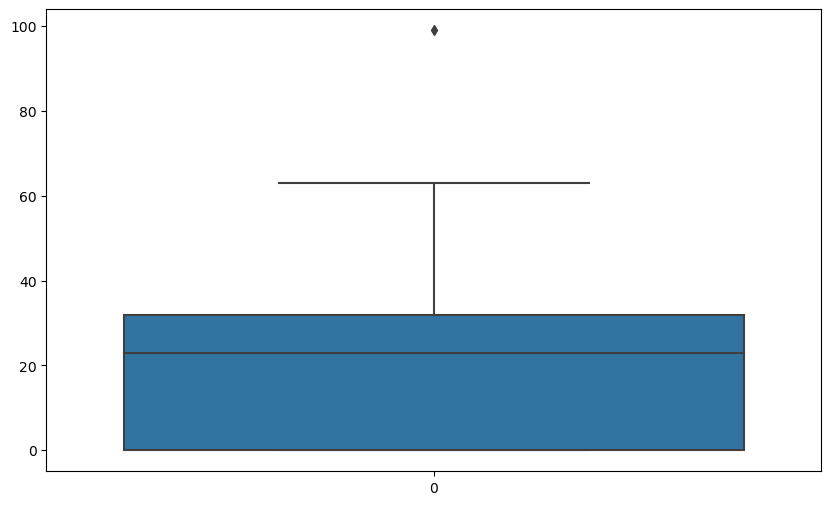

In [17]:
sns.boxplot(df.SkinThickness)

In [21]:
df = df[df.SkinThickness<70]

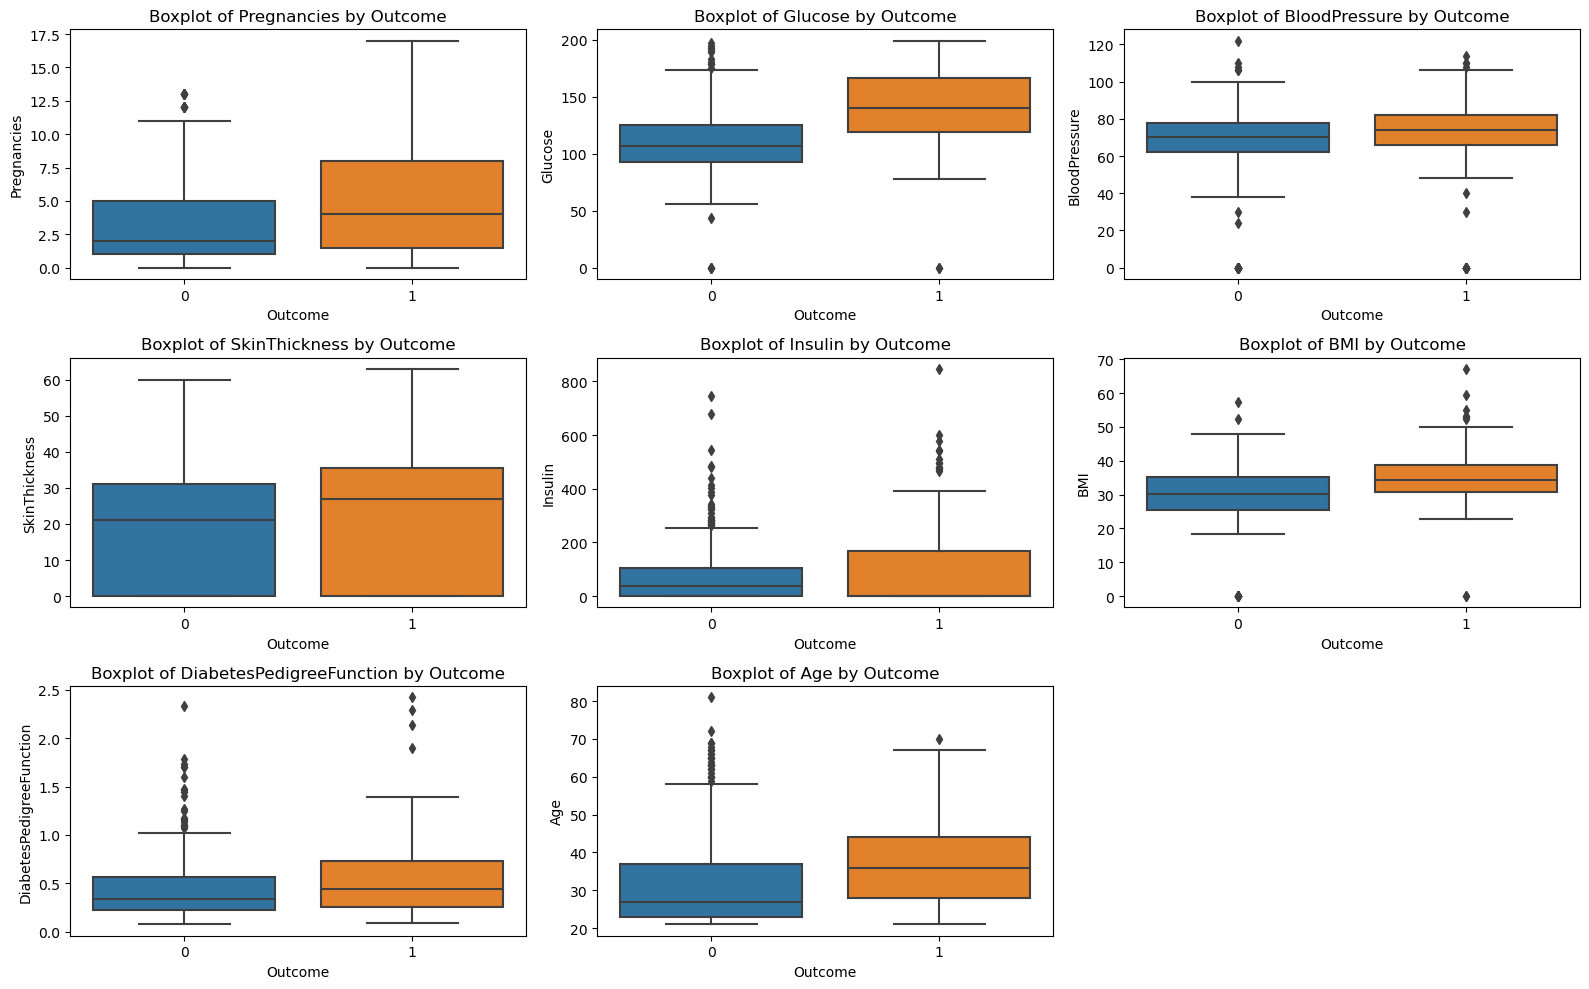

In [22]:
# Boxplots to compare distributions of features between diabetic and non-diabetic patients
plt.figure(figsize=(16, 10))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Outcome', y=column, data=df)
    plt.title(f'Boxplot of {column} by Outcome')
plt.tight_layout()
plt.show()

In [24]:
import plotly.express as px
plt.figure(figsize=(10,8))
fig = px.imshow(df.corr(), text_auto='.2f', aspect="auto", color_continuous_scale='RdBu_r')
fig.show()

<Figure size 1000x800 with 0 Axes>

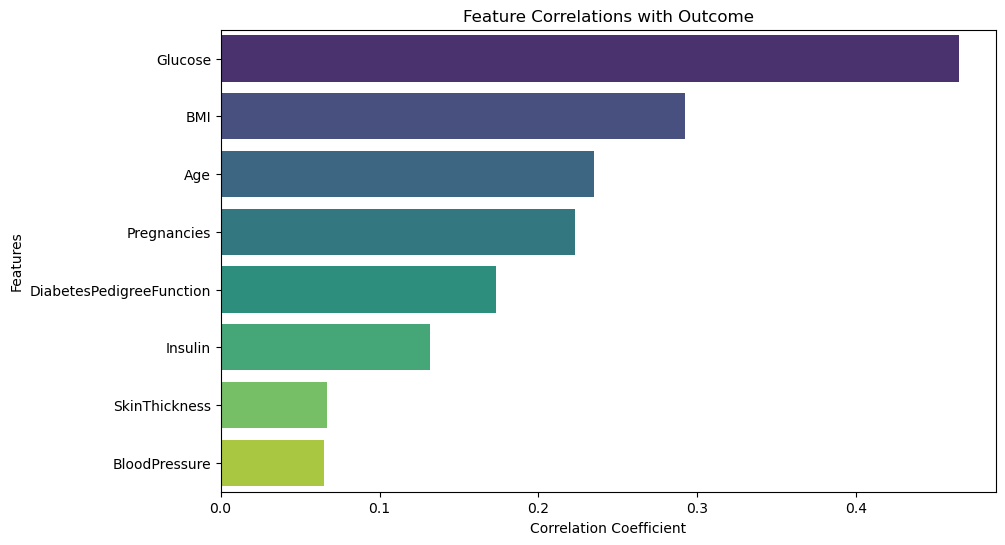

In [27]:
# Calculate the correlation with the 'Outcome' variable
correlations = df.corr()['Outcome'].drop('Outcome')

# Sort correlations in descending order
correlations_sorted = correlations.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations_sorted.values, y=correlations_sorted.index, palette="viridis")
plt.title('Feature Correlations with Outcome')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

# Train | Test Split

In [29]:
X =df.drop(columns='Outcome')
y =df['Outcome']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [33]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (613, 8)
X_test shape: (154, 8)
y_train shape: (613,)
y_test shape: (154,)


# Modelling

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [35]:
operations = ()
pipe_model = Pipeline()

TypeError: Pipeline.__init__() missing 1 required positional argument: 'steps'

## Model Performance on Classification Tasks

**When Should We Look at Macro Scores, and When Should We Look at Accuracy?**

Imbalanced datasets are situations where some classes have significantly more examples than others. For example, in a model diagnosing a disease, the number of negative examples (those without the disease) might be much higher than the positive examples (those with the disease). In such cases, there is a risk that the model will learn the majority class (negative examples) and ignore the minority class (positive examples). It's important to understand which metrics should be used in these kinds of imbalanced datasets.

**Macro Metrics**

In imbalanced datasets, we need to look at "macro" metrics. Macro metrics take the simple average of performance metrics calculated separately for each class. For instance, the "macro F1 score" is the arithmetic mean of the F1 scores calculated separately for each class. This makes it harder to overlook the performance of the minority class and ensures that the model learns all classes in a balanced way.

**Features of Macro Metrics:**
- Evaluate the performance of each class separately.
- Show whether the model learns all classes in a balanced way.
- Make it difficult to ignore the performance of minority classes.

**Accuracy Metrics**

The accuracy metric can often be misleading in imbalanced datasets. If a model consistently predicts the majority class correctly, it can achieve a high accuracy score. This does not mean the model performs well on the minority class. Therefore, in imbalanced datasets, "macro" metrics are preferred over accuracy.

**Limitations of Accuracy Metrics:**
- Can be misleading in imbalanced datasets.
- May ignore the performance of minority classes even if the majority class is predicted correctly.
- Does not reflect the model's success in learning minority classes.

**Conclusion**

Using macro metrics to evaluate model performance in imbalanced datasets provides a more accurate approach as they assess each class's performance separately and do not ignore the performance of minority classes. The accuracy metric should be used cautiously in imbalanced datasets, as it can be misleading.

Focusing on macro metrics is the best approach if a balanced performance across all classes is desired. This ensures that the model performs well not only on the majority class but also on minority classes, providing a more holistic view of overall model performance.

## Cross Validate

## Cross Validate for 0 class

## GridSearchCV

[Logistic Regression Hyperparameters](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

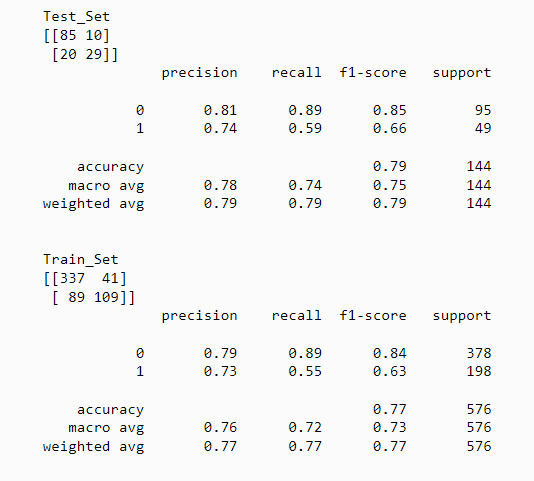

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

[Threshold Optimization](https://towardsdatascience.com/calculating-and-setting-thresholds-to-optimise-logistic-regression-performance-c77e6d112d7el)

## Precision Recall Curve

# Finding Best Thresholds

# Final Model and Model Deployment

## New Predictions for optimal_threshols

# <p style="background-color:green;font-family:newtimeroman;font-size:100%;color:white;text-align:center;border-radius:20px 20px;"><b>Thank you in the hope that it will be useful</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>If you want to be the first to be informed about updates, please do not forget to follow us. </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [WhatsApp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |